#Music Genre Classification

Purpose of this project is to build and train a CNN for predicting songs' music genre. Training will be conducted using Mel spectrograms of audio files, found in the GTZAN dataset.

This dataset contains images, each labeled as one of the following classes:

1.   Blues
2.   Classical music
3.   Country
4.   Disco
5.   Hip hop
6.   Jazz
7.   Metal
8.   Pop
9.   Reggae
10.   Rock






##Imports

In [ ]:
from google.colab import drive, files
import os
import cv2
import matplotlib.pyplot as plt, matplotlib.ticker as ticker
import numpy as np
%matplotlib inline
from time import time
import IPython.display as ipd
import librosa, librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import random
import torch 
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

##Downloading the dataset

In [ ]:
! pip install -q kaggle

In [ ]:
files.upload() # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ellievak","key":"77078e5149ad89b552c9ad480d4e1620"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'andradaolteanu/gtzan-dataset-music-genre-classification'
! mkdir music
! unzip gtzan-dataset-music-genre-classification.zip -d music
! rm *.zip

 99% 1.20G/1.21G [00:09<00:00, 128MB/s]
100% 1.21G/1.21G [00:09<00:00, 134MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: music/Data/features_30_sec.csv  
  inflating: music/Data/features_3_sec.csv  
  inflating: music/Data/genres_original/blues/blues.00000.wav  
  inflating: music/Data/genres_original/blues/blues.00001.wav  
  inflating: music/Data/genres_original/blues/blues.00002.wav  
  inflating: music/Data/genres_original/blues/blues.00003.wav  
  inflating: music/Data/genres_original/blues/blues.00004.wav  
  inflating: music/Data/genres_original/blues/blues.00005.wav  
  inflating: music/Data/genres_original/blues/blues.00006.wav  
  inflating: music/Data/genres_original/blues/blues.00007.wav  
  inflating: music/Data/genres_original/blues/blues.00008.wav  
  inflating: music/Data/genres_original/blues/blues.00009.wav  
  inflating: music/Data/genres_original/blues/blues.00010.wav  
  inflating: music/Data/genres_original/blues/blues.00011.wav  
  infl

In [ ]:
ls

kaggle.json  music/  sample_data/


##Working with Image files

Image path: /content/music/Data/images_original/blues/blues00063.png, index: 46
Image path: /content/music/Data/images_original/classical/classical00009.png, index: 68
Image path: /content/music/Data/images_original/country/country00090.png, index: 93
Image path: /content/music/Data/images_original/disco/disco00068.png, index: 59
Image path: /content/music/Data/images_original/hiphop/hiphop00070.png, index: 80
Image path: /content/music/Data/images_original/jazz/jazz00022.png, index: 86
Image path: /content/music/Data/images_original/metal/metal00080.png, index: 73
Image path: /content/music/Data/images_original/pop/pop00059.png, index: 56
Image path: /content/music/Data/images_original/reggae/reggae00094.png, index: 84
Image path: /content/music/Data/images_original/rock/rock00055.png, index: 24


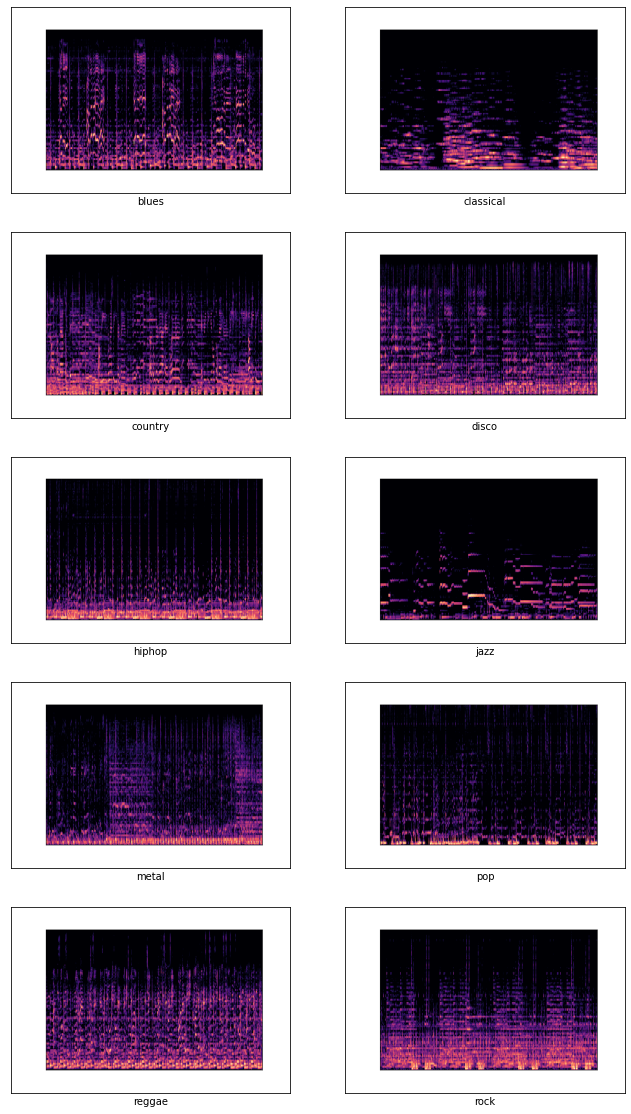

In [ ]:
main_dir='/content/music/Data/images_original'
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

blues_img = [im for im in os.listdir('music/Data/images_original/blues')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
classical_img = [im for im in os.listdir('music/Data/images_original/classical')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
country_img = [im for im in os.listdir('music/Data/images_original/country')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
disco_img = [im for im in os.listdir('music/Data/images_original/disco')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
hiphop_img = [im for im in os.listdir('music/Data/images_original/hiphop')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
jazz_img = [im for im in os.listdir('music/Data/images_original/jazz')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
metal_img = [im for im in os.listdir('music/Data/images_original/metal')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
pop_img = [im for im in os.listdir('music/Data/images_original/pop')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
reggae_img = [im for im in os.listdir('music/Data/images_original/reggae')
              if any(im.endswith(ext) for ext in ['jpg','png'])]
rock_img = [im for im in os.listdir('music/Data/images_original/rock')
              if any(im.endswith(ext) for ext in ['jpg','png'])]

plt.figure(figsize=(11,20))                                               
for i in range (0,10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    r = random.randint(0, 99)
    if i%2==0:
      if i==0:
        path = main_dir + "/" + classes[i] + "/" +  blues_img[r]
      elif i==2:
        path = main_dir + "/" + classes[i] + "/" +  country_img[r]
      elif i==4:
        path = main_dir + "/" + classes[i] + "/" +  hiphop_img[r]
      elif i==6:
        path = main_dir + "/" + classes[i] + "/" +  metal_img[r]
      else:
        path = main_dir + "/" + classes[i] + "/" +  reggae_img[r]
    else:
      if i==1:
        path = main_dir + "/" + classes[i] + "/" +  classical_img[r]
      elif i==3:
        path = main_dir + "/" + classes[i] + "/" +  disco_img[r]
      elif i==5:
        r = random.randint(0, 98)
        path = main_dir + "/" + classes[i] + "/" +  jazz_img[r]
      elif i==7:
        path = main_dir + "/" + classes[i] + "/" +  pop_img[r]
      else:
        path = main_dir + "/" + classes[i] + "/" +  rock_img[r]   
    print(f'Image path: {path}, index: {r}') 
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
print('Number of: \n blues song images =', len(blues_img),'\n classical song images =' ,len(classical_img),'\n country song images =' ,len(country_img), '\n disco song images =' ,len(disco_img),'\n hiphop song images =' ,len(hiphop_img), '\n jazz song images =' ,len(jazz_img), '\n metal song images =' ,len(metal_img),'\n pop song images =' ,len(pop_img),'\n reggae song images =' ,len(reggae_img), '\n rock song images =' ,len(rock_img))

Number of: 
 blues song images = 100 
 classical song images = 100 
 country song images = 100 
 disco song images = 100 
 hiphop song images = 100 
 jazz song images = 99 
 metal song images = 100 
 pop song images = 100 
 reggae song images = 100 
 rock song images = 100


In [ ]:
def load_data(main_dir):
    images = []
    labels = []
    size = 128,128
    index = -1
    for folder in os.listdir(main_dir):
        index +=1
        for image in os.listdir(main_dir + '/' + folder):
            temp_img = cv2.imread(main_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(main_dir)

Loaded 899 images for training, Train data shape = (899, 128, 128, 3)
Loaded 100 images for testing Test data shape = (100, 128, 128, 3)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.11, random_state = 1) 
print('Loaded', len(x_train),'images for training.','Train data shape =', x_train.shape)
print('Loaded', len(x_val),'images for validation.','Validation data shape =', x_val.shape)

Loaded 800 images for training. Train data shape = (800, 128, 128, 3)
Loaded 99 images for validation. Validation data shape = (99, 128, 128, 3)


##Custom Convolutional Neural Network 

In [ ]:
classes = 10
batch = 90
epochs = 400

In [ ]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))
model.add(Dropout(0.3))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'valid'))
model.add(Dropout(0.3))

model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

In [ ]:
adam = Adam(learning_rate=0.0001)
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_val, y_val), shuffle = True, verbose=1, 
                    callbacks=[save_model])

Epoch 1/400
9/9 [==============================] - ETA: 0s - loss: 3.4532 - accuracy: 0.1088
Epoch 1: val_loss improved from inf to 2.43319, saving model to best_model.h5
9/9 [==============================] - 3s 255ms/step - loss: 3.4532 - accuracy: 0.1088 - val_loss: 2.4332 - val_accuracy: 0.0707
Epoch 2/400
9/9 [==============================] - ETA: 0s - loss: 2.3116 - accuracy: 0.2113
Epoch 2: val_loss did not improve from 2.43319
9/9 [==============================] - 1s 157ms/step - loss: 2.3116 - accuracy: 0.2113 - val_loss: 3.2024 - val_accuracy: 0.0707
Epoch 3/400
9/9 [==============================] - ETA: 0s - loss: 1.9705 - accuracy: 0.3250
Epoch 3: val_loss did not improve from 2.43319
9/9 [==============================] - 1s 155ms/step - loss: 1.9705 - accuracy: 0.3250 - val_loss: 4.1357 - val_accuracy: 0.0707
Epoch 4/400
9/9 [==============================] - ETA: 0s - loss: 1.7879 - accuracy: 0.3487
Epoch 4: val_loss did not improve from 2.43319
9/9 [=================

##Model Performance

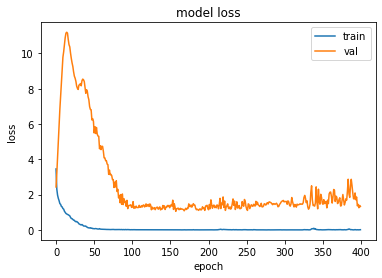

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

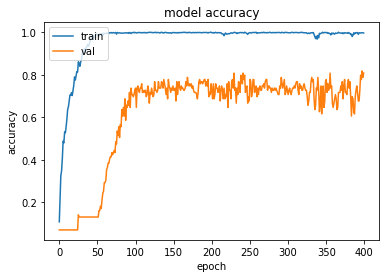

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history.model.load_weights('best_model.h5')
np.mean(np.argmax(history.model.predict(x_test),1)==np.argmax(y_test,1))

4/4 [==============================] - 0s 16ms/step


0.75

In [ ]:
y_pred = model.predict(x_test) 
y_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)
print(classification_report(y_true, y_classes))

4/4 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       1.00      1.00      1.00         2
           2       0.82      0.69      0.75        13
           3       1.00      0.93      0.96        14
           4       0.75      0.69      0.72        13
           5       0.67      0.25      0.36         8
           6       0.91      1.00      0.95        10
           7       0.64      0.70      0.67        10
           8       0.62      0.80      0.70        10
           9       0.62      0.77      0.69        13

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.74       100

